In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
from platform import python_version
print(python_version())

3.9.12


In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.device(0)

In [6]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [7]:
x = torch.tensor([5, 3])
y = torch.tensor([[2], [1]])
print(x.matmul(y))

tensor([13])


In [8]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [9]:
print(x.shape)

torch.Size([2, 5])


In [10]:
y = torch.rand([2, 5])

In [11]:
y

tensor([[0.1799, 0.0239, 0.9798, 0.0708, 0.9177],
        [0.9953, 0.2759, 0.5428, 0.8502, 0.6079]])

In [12]:
y = y.view([1, 10])
print(y)

tensor([[0.1799, 0.0239, 0.9798, 0.0708, 0.9177, 0.9953, 0.2759, 0.5428, 0.8502,
         0.6079]])


In [13]:
train = datasets.MNIST("", train=True, download=True, 
                      transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=True, download=False, 
                      transform=transforms.Compose([transforms.ToTensor()]))

In [14]:
trainset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [15]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [16]:
x, y = data[0][0], data[1][0]
print(x.shape, y)

torch.Size([1, 28, 28]) tensor(6)


In [17]:
import matplotlib
import matplotlib.pyplot as plt

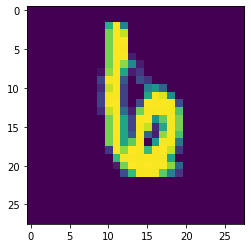

In [18]:
#plt.imshow(data[0][0])
plt.imshow(data[0][0].view([28, 28]))

In [19]:
total = 0
counter_dict = {i:0 for i in range(10)}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [20]:
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


# Neural Networks

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [67]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x
    
        

In [68]:
net = NeuralNet()
print(net)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [69]:
X = torch.rand((28, 28))
X = X.view([-1, 28*28])

In [70]:
output = net(X)

In [71]:
print(output)

tensor([[-2.4243, -2.4204, -2.3935, -2.2946, -2.1992, -2.2320, -2.3996, -2.1772,
         -2.2348, -2.2914]], grad_fn=<LogSoftmaxBackward0>)


In [72]:
import torch.optim as optim

In [73]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [78]:
EPOCHS = 10

In [79]:
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0920, grad_fn=<NllLossBackward0>)
tensor(0.0450, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0798, grad_fn=<NllLossBackward0>)
tensor(0.1398, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.2258, grad_fn=<NllLossBackward0>)


In [80]:
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.996


In [81]:
import matplotlib.pyplot as plt

In [82]:
%matplotlib inline

tensor(8)
tensor(8)


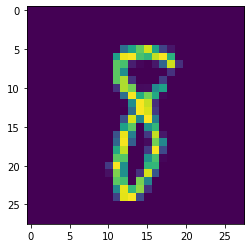

In [94]:
ind = 11
plt.imshow(X[ind].view(28,28))
print(y[ind])
print(torch.argmax(net(X[ind].view(-1, 28*28))[0]))